In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')         # Seaborn’s style control
sns.set_context('notebook', font_scale=1.2)

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
print('feature matrix shape:', X.shape)
print('feature vector shape:', y.shape)

feature matrix shape: (300, 2)
feature vector shape: (300,)


In [5]:
%matplotlib notebook


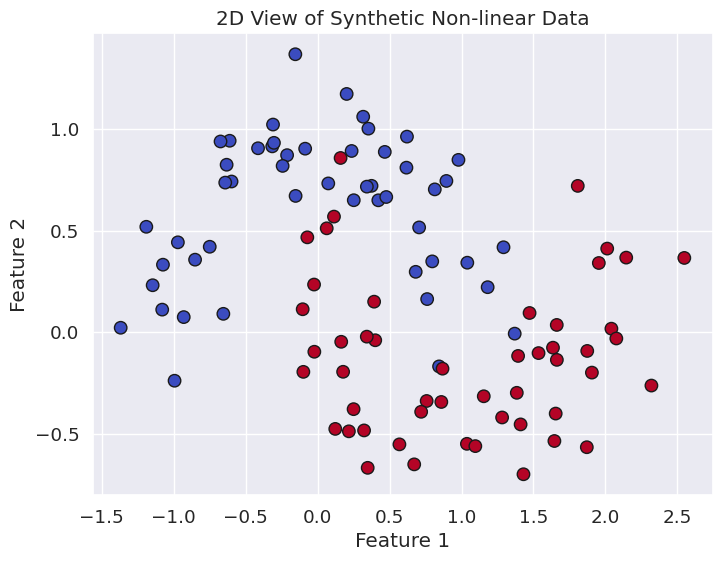

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=80)
plt.title("2D View of Synthetic Non-linear Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

X shape: (100, 2), y shape: (100,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

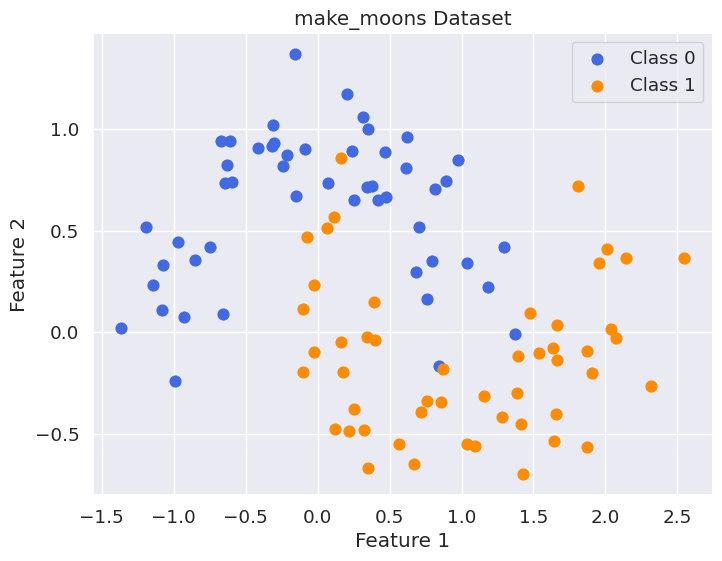

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate data
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Convert y to NumPy array if not already
y = np.array(y)

# Check shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Correct scatter usage
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='royalblue', label='Class 0', s=60)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', s=60)
plt.title("make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


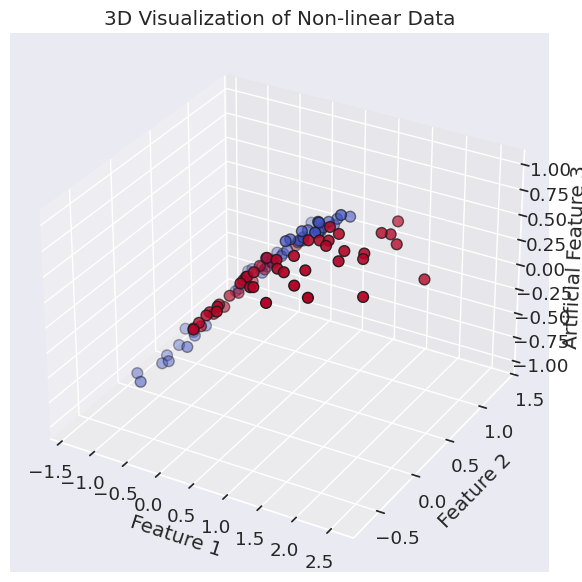

In [22]:
# ✒ 3D Visualization — We'll add a fake Z-dimension using a transform (for visualization only)

# Create a 3D scatter plot using sin/cos transformation to get a third dimension
X_3D = np.column_stack((X, np.sin(X[:, 0]) * np.cos(X[:, 1])))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=y, cmap='coolwarm', s=60, edgecolors='k')
ax.set_title("3D Visualization of Non-linear Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Artificial Feature 3")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the synthetic data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Standardize features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test :", X_test_scaled.shape)


Shape of X_train: (70, 2)
Shape of X_test : (30, 2)


🔎 Accuracy (Linear Kernel): 86.67 %


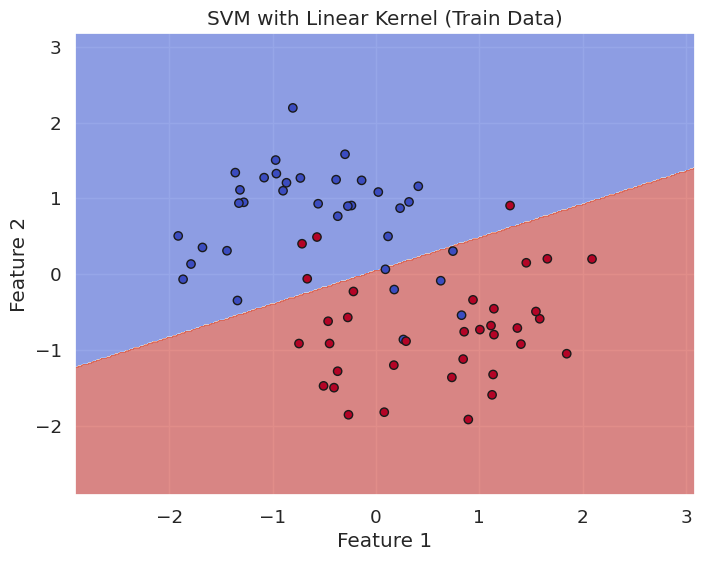

In [24]:
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train_scaled, y_train)

# Step 2: Predict and evaluate
y_pred_linear = linear_svc.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("🔎 Accuracy (Linear Kernel):", round(acc_linear * 100, 2), "%")

# Step 3: Visualize Decision Boundary (2D)
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Apply on scaled training data for clearer boundaries
plot_decision_boundary(linear_svc, X_train_scaled, y_train, "SVM with Linear Kernel (Train Data)")

🔎 Accuracy (RBF Kernel): 93.33 %


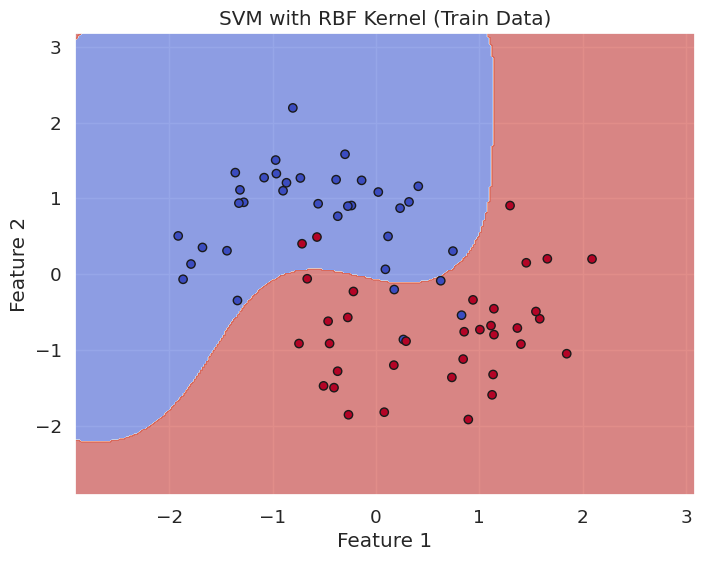

In [25]:
# Step 1: Train SVM with RBF Kernel
rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_scaled, y_train)

# Step 2: Predict and evaluate
y_pred_rbf = rbf_svc.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("🔎 Accuracy (RBF Kernel):", round(acc_rbf * 100, 2), "%")

# Step 3: Visualize Decision Boundary (2D)
plot_decision_boundary(rbf_svc, X_train_scaled, y_train, "SVM with RBF Kernel (Train Data)")

🔍 Accuracy with Polynomial Kernel: 90.0 %


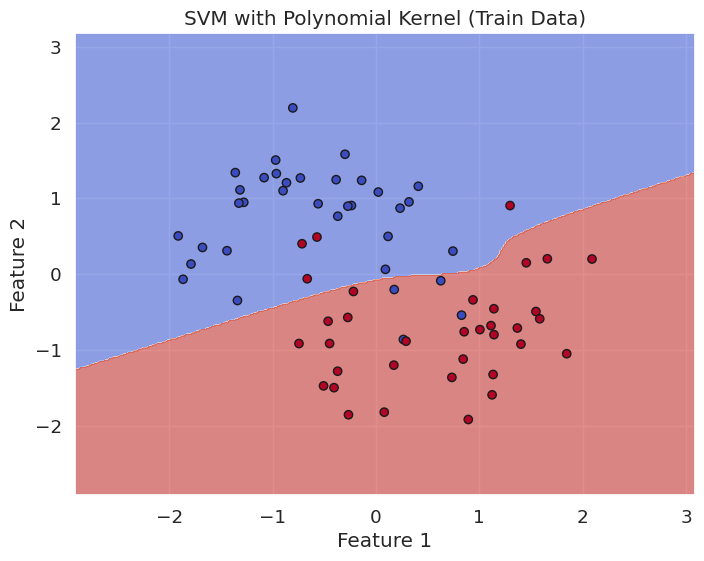

In [26]:
# 🔧 Train SVM with Polynomial Kernel (degree = 3 by default)
poly_svc = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=1.0))
poly_svc.fit(X_train, y_train)

# ✅ Evaluate performance
y_pred_poly = poly_svc.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

print("🔍 Accuracy with Polynomial Kernel:", round(acc_poly * 100, 2), "%")

# 📊 Visualize decision boundary
plot_decision_boundary(poly_svc, X_train_scaled, y_train, "SVM with Polynomial Kernel (Train Data)")


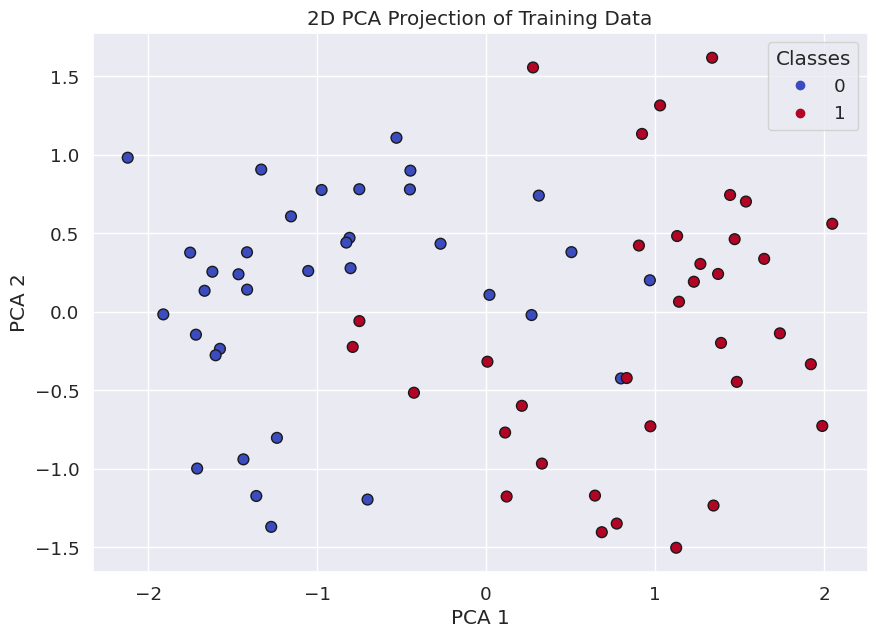

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# # 🧠 Reduce dimensionality to 3D for plotting (from actual feature space)
# pca = PCA(n_components=3)
# X_3D = pca.fit_transform(X_train_scaled)

# # 🖼️ Plot in 3D using true labels
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=y_train, cmap='coolwarm', s=60, edgecolors='k')

# ax.set_title("3D PCA Projection of Training Data")
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_train, cmap='coolwarm', s=60, edgecolors='k')
plt.title("2D PCA Projection of Training Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dictionary to store models
models = {
    "Linear Kernel": linear_svc,
    "RBF Kernel": rbf_svc,
    "Polynomial Kernel": poly_svc
}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")

    y_pred = model.predict(X_test_scaled)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 3))
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- Linear Kernel ---
Confusion Matrix:
 [[13  2]
 [ 2 13]]
Accuracy Score: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


--- RBF Kernel ---
Confusion Matrix:
 [[15  0]
 [ 2 13]]
Accuracy Score: 0.933
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


--- Polynomial Kernel ---
Confusion Matrix:
 [[14  1]
 [ 3 12]]
Accuracy Score: 0.867
Classification Report:
               precision 

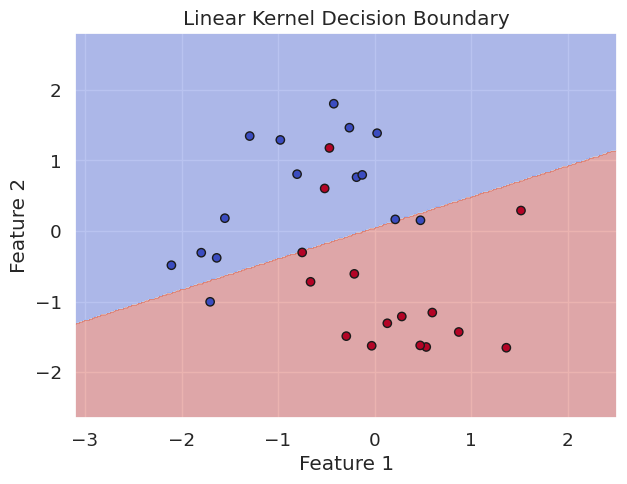

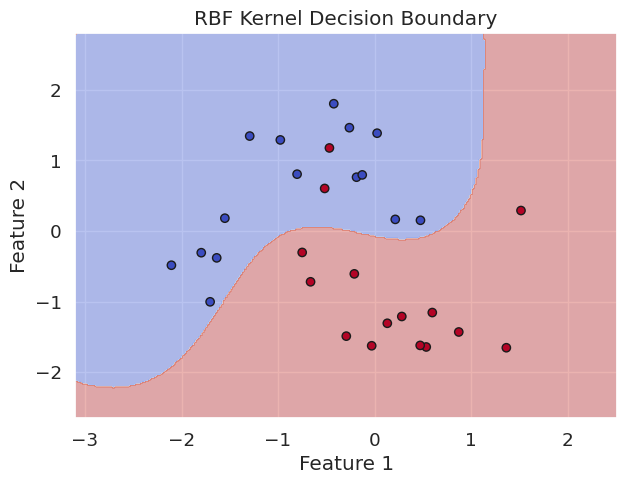

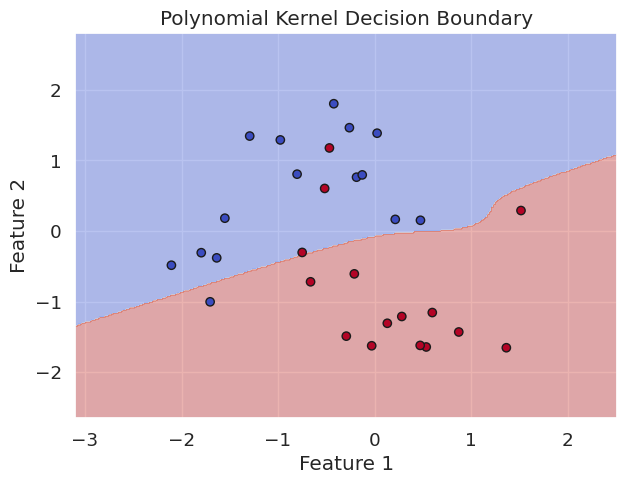

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Plot for each kernel
plot_decision_boundary(linear_svc, X_test_scaled, y_test, "Linear Kernel Decision Boundary")
plot_decision_boundary(rbf_svc, X_test_scaled, y_test, "RBF Kernel Decision Boundary")
plot_decision_boundary(poly_svc, X_test_scaled, y_test, "Polynomial Kernel Decision Boundary")
